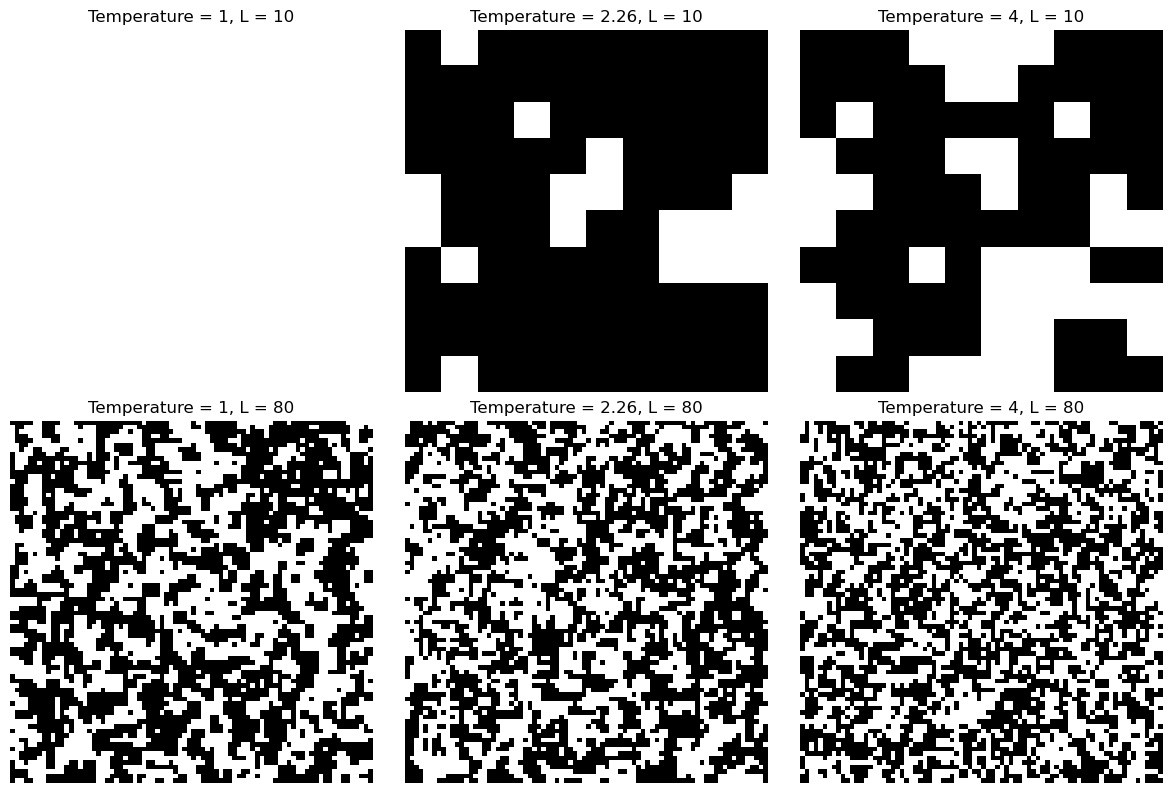

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L, probability_of_spin_up):
    lattice = np.random.choice([-1, 1], size=(L, L), p=[1 - probability_of_spin_up, probability_of_spin_up])
    return lattice

def update(lattice, temperature):
    L = lattice.shape[0]
    i = np.random.randint(L)
    j = np.random.randint(L)
    spin = lattice[i, j]
    neighbors = lattice[(i+1)%L, j] + lattice[i-1, j] + lattice[i, (j+1)%L] + lattice[i, j-1]
    energy_diff = 2 * spin * neighbors
    if (energy_diff <= 0) or (temperature > 0 and np.random.uniform() < np.exp(-energy_diff / temperature)):
        lattice[i, j] = -spin

# Parameters
L1 = 10 
L2 = 80  
probability_of_spin_up = 0.5
temperatures = [1, 2.26, 4]  # Temperatures

steps_MCS = 100
steps_L = 100
N = steps_MCS*steps_L  # Total number of steps per trajectory

# Simulate and plot figures
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, temperature in enumerate(temperatures):
    # Simulate for L1 (10x10)
    lattice1 = initialize_lattice(L1, probability_of_spin_up)
    for j in range(N):
        update(lattice1, temperature)
    axes[0, i].imshow(lattice1, cmap='binary', vmin=-1, vmax=1)
    axes[0, i].set_title(f'Temperature = {temperature}, L = {L1}')
    axes[0, i].axis('off')
    np.savetxt(f'lattice_10_T{temperature}.txt', lattice1)

    # Simulate for L2 (80x80)
    lattice2 = initialize_lattice(L2, probability_of_spin_up)
    for j in range(N):
        update(lattice2, temperature)
    axes[1, i].imshow(lattice2, cmap='binary', vmin=-1, vmax=1)
    axes[1, i].set_title(f'Temperature = {temperature}, L = {L2}')
    axes[1, i].axis('off')
    np.savetxt(f'lattice_80_T{temperature}.txt', lattice2)

plt.tight_layout()
plt.show()
